In [223]:
# Load basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [224]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [225]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("test.xlsx")
df = pd.concat([train, test], sort=False)

In [226]:
test.shape

(537, 9)

In [227]:
train.shape

(5699, 9)

In [228]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Unnamed: 0
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN


In [229]:
df.shape

(6236, 10)

In [230]:
df.isnull().sum()

Title              0
Author             0
Edition            0
Reviews            0
Ratings            0
Synopsis           0
Genre              0
BookCategory       0
Price            537
Unnamed: 0      5699
dtype: int64

In [231]:
df.rename(columns={'Reviews': 'Ratings', 'Ratings': 'Reviews'}, inplace=True)

In [232]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN


In [154]:
pattern = r'^[0-9]+(\.[0-9])? out of 5 stars$'
valid_ratings = df['Ratings'].str.match(pattern)
print(valid_ratings)


0      True
1      True
2      True
3      True
4      True
       ... 
532    True
533    True
534    True
535    True
536    True
Name: Ratings, Length: 6236, dtype: bool


In [155]:
all(valid_ratings)

True

In [156]:
df['Ratings'] = df['Ratings'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)

In [157]:
df['Reviews'] = df['Reviews'].str.extract(r'(\d+)').astype(int)

In [158]:
df[['EditionBinding','EditionType1']] = \
    df['Edition'].str.split(',– ',expand=True)

edition_binding_dict = df['EditionBinding'].value_counts().to_dict()

df['EditionBinding'] = df['EditionBinding'].apply(lambda x: \
        (x if edition_binding_dict[x] > 9 else 'other'))

In [159]:
def split_edition_1(x):
    j_arr = []
    date = ''

    for j in x.split(', '):
        if not any(k.isnumeric() for k in j):
            j_arr.append(j.strip())
        else:
            date = j

    if ''.join(j_arr) != '':
        ed = ', '.join(j_arr)
    else:
        ed = 'other'

    if ed != 'Import' and ed != 'Illustrated' and ed \
        != 'Special Edition' and ed != 'Unabridged' and ed \
        != 'Student Edition' and ed != 'Box set' and ed \
        != 'International Edition' and ed != 'Abridged':
        ed_ret = 'other'
    else:
        ed_ret = ed

    return (ed_ret, date)

In [160]:
df['EditionType'],df['EditionDate'] = \
    zip(*df['EditionType1'].apply(split_edition_1))

In [161]:
df['EditionDate'] = pd.to_datetime(df['EditionDate'], errors='coerce')
df['Year'] = df['EditionDate'].dt.year
df['Month'] = df['EditionDate'].dt.month_name()

In [162]:
df.dtypes

Title                     object
Author                    object
Edition                   object
Ratings                  float64
Reviews                    int32
Synopsis                  object
Genre                     object
BookCategory              object
Price                    float64
Unnamed: 0               float64
EditionBinding            object
EditionType1              object
EditionType               object
EditionDate       datetime64[ns]
Year                     float64
Month                     object
dtype: object

In [163]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN,Paperback,10 Mar 2016,other,2016-03-10,2016.0,March
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN,Paperback,7 Nov 2012,other,2012-11-07,2012.0,November
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN,Paperback,25 Feb 1982,other,1982-02-25,1982.0,February
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2017.0,October
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,Hardcover,10 Oct 2006,other,2006-10-10,2006.0,October


In [164]:
df.isnull().sum()

Title                0
Author               0
Edition              0
Ratings              0
Reviews              0
Synopsis             0
Genre                0
BookCategory         0
Price              537
Unnamed: 0        5699
EditionBinding       0
EditionType1         0
EditionType          0
EditionDate        452
Year               452
Month              452
dtype: int64

In [165]:
df.head(10)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN,Paperback,10 Mar 2016,other,2016-03-10,2016.0,March
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN,Paperback,7 Nov 2012,other,2012-11-07,2012.0,November
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN,Paperback,25 Feb 1982,other,1982-02-25,1982.0,February
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2017.0,October
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,Hardcover,10 Oct 2006,other,2006-10-10,2006.0,October
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5,8,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,NaN,Paperback,5 May 2009,other,2009-05-05,2009.0,May
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4,72,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2017.0,October
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7,16,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,NaN,Hardcover,"Import, 1 Mar 2018",Import,2018-03-01,2018.0,March
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2,111,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,NaN,Paperback,15 Dec 2015,other,2015-12-15,2015.0,December
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0,1,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,NaN,Paperback,26 Mar 2013,other,2013-03-26,2013.0,March


In [166]:
missing_year_rows = df[df['Year'].isnull()]

In [167]:
missing_year_rows

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month
19,"Introducing Data Science: Big Data, Machine Le...","Davy Cielen, Arno D.B. Meysman, Mohamed Ali","Paperback,– 2016",4.3,5,Introducing Data Science explains vital data s...,Artificial Intelligence,"Computing, Internet & Digital Media",352.0,NaN,Paperback,2016,other,NaT,NaN,NaN
35,HANNIBAL RISING,Thomas Harris,"Paperback,– 2019",4.3,8,_________________________ hannibal lecter wasn...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",309.0,NaN,Paperback,2019,other,NaT,NaN,NaN
44,Daisy Jones and The Six,Taylor Jenkins Reid,"Hardcover,– 2019",4.6,6,picked as < u> one to watch in 2019</u> by <th...,Music Books,Romance,560.0,NaN,Hardcover,2019,other,NaT,NaN,NaN
60,Mastering VBA for Microsoft Office 2016 (SYBEX),Richard Mansfield,"Paperback,– 2016",5.0,1,Mastering VBA for Microsoft Office 2016 helps ...,Programming Languages (Books),"Computing, Internet & Digital Media",743.0,NaN,Paperback,2016,other,NaT,NaN,NaN
98,Sap Hr Personnel Administration and Recruitmen...,Agrawal P.K,"Paperback,– 2011",5.0,2,SAP is a great software. One needs to fully un...,Business Communication,"Computing, Internet & Digital Media",449.0,NaN,Paperback,2011,other,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,"Introduction to Computer Science, 2/Ed",ITL,"Paperback,– 2011",4.7,10,The book furthers the first edition by includi...,Computer Science Books,"Computing, Internet & Digital Media",NaN,476.0,Paperback,2011,other,NaT,NaN,NaN
477,The Adventures Of Suppandi – 1 (Tinkle),Luis Fernandes,"Paperback,– 2010",4.3,90,If you love Suppandi and his rib-tickling anti...,Comics & Graphic Novels (Books),Comics & Mangas,NaN,477.0,Paperback,2010,other,NaT,NaN,NaN
514,The Abominable,Dan Simmons,"Paperback,– Jan 2014",1.0,1,June 1924. On the brutal North East Ridge of M...,Action & Adventure (Books),Action & Adventure,NaN,514.0,Paperback,Jan 2014,other,NaT,NaN,NaN
517,The Psychology Book (Big Ideas),D.K.,"Hardcover,– 2015",4.2,38,The Psychology Book (Big Ideas Simply Explaine...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",NaN,517.0,Hardcover,2015,other,NaT,NaN,NaN


In [168]:
for index, value in missing_year_rows['EditionType1'].items():
    if str(value).isdigit() and len(str(value)) == 4:
        df.at[index, 'Year'] = int(value)

In [169]:
import calendar
missing_month_rows = df[df['Month'].isnull()]
for index, value in missing_month_rows['EditionType1'].items():
    for month_num, month_name in enumerate(calendar.month_abbr[1:]):
        if month_name.lower() in str(value).lower():
            df.at[index, 'Month'] = month_name
            break

In [170]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN,Paperback,10 Mar 2016,other,2016-03-10,2016.0,March
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN,Paperback,7 Nov 2012,other,2012-11-07,2012.0,November
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN,Paperback,25 Feb 1982,other,1982-02-25,1982.0,February
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2011.0,October
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,Hardcover,10 Oct 2006,other,2006-10-10,2006.0,October


In [171]:
df.isnull().sum()

Title                0
Author               0
Edition              0
Ratings              0
Reviews              0
Synopsis             0
Genre                0
BookCategory         0
Price              537
Unnamed: 0        5699
EditionBinding       0
EditionType1         0
EditionType          0
EditionDate        452
Year               110
Month              369
dtype: int64

In [172]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [173]:
df['SynopsisSentiment'] = df['Synopsis'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [174]:
df['Title_Length'] = df['Title'].apply(lambda x: len(x))

In [175]:
df['Synopsis_Length'] = df['Synopsis'].apply(lambda x: len(x))

In [176]:
df['TitleSentiment'] = df['Title'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [177]:
def has_initials_with_dot(author_name):
    initials_with_dot = [name for name in author_name.split() if '.' in name and name[:-1].isalpha()]
    return int(bool(initials_with_dot))

df['HasInitials'] = df['Author'].apply(has_initials_with_dot)

In [178]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN,Paperback,10 Mar 2016,other,2016-03-10,2016.0,March,0.9381,35,791,0.0000,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN,Paperback,7 Nov 2012,other,2012-11-07,2012.0,November,0.9889,34,1146,-0.6597,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN,Paperback,25 Feb 1982,other,1982-02-25,1982.0,February,0.9809,28,1662,0.0000,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2011.0,October,-0.9643,34,426,0.0000,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,Hardcover,10 Oct 2006,other,2006-10-10,2006.0,October,0.9080,42,659,0.0000,0


In [179]:
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [180]:
df['Month'] = df['Month'].fillna(df['Month'].mode().iloc[0])

In [181]:
df.isnull().sum()

Title                   0
Author                  0
Edition                 0
Ratings                 0
Reviews                 0
Synopsis                0
Genre                   0
BookCategory            0
Price                 537
Unnamed: 0           5699
EditionBinding          0
EditionType1            0
EditionType             0
EditionDate           452
Year                    0
Month                   0
SynopsisSentiment       0
Title_Length            0
Synopsis_Length         0
TitleSentiment          0
HasInitials             0
dtype: int64

In [182]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Unnamed: 0,EditionBinding,EditionType1,EditionType,EditionDate,Year,Month,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,NaN,Paperback,10 Mar 2016,other,2016-03-10,2016.0,March,0.9381,35,791,0.0000,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,NaN,Paperback,7 Nov 2012,other,2012-11-07,2012.0,November,0.9889,34,1146,-0.6597,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,NaN,Paperback,25 Feb 1982,other,1982-02-25,1982.0,February,0.9809,28,1662,0.0000,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,NaN,Paperback,5 Oct 2017,other,2017-10-05,2011.0,October,-0.9643,34,426,0.0000,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,Hardcover,10 Oct 2006,other,2006-10-10,2006.0,October,0.9080,42,659,0.0000,0


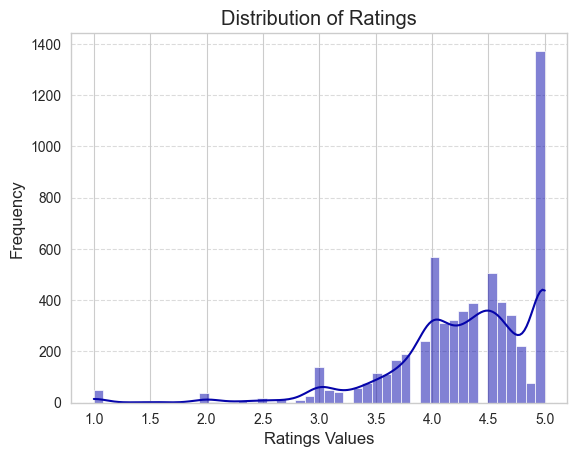

In [183]:
sns.histplot(df['Ratings'], kde=True, color='#0504aa', bins='auto')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


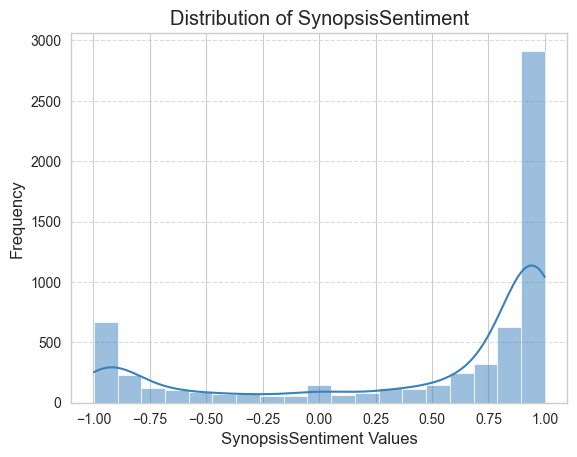

In [184]:
sns.histplot(df['SynopsisSentiment'], kde=True, color='#3981ba', bins='auto')
plt.title('Distribution of SynopsisSentiment')
plt.xlabel('SynopsisSentiment Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


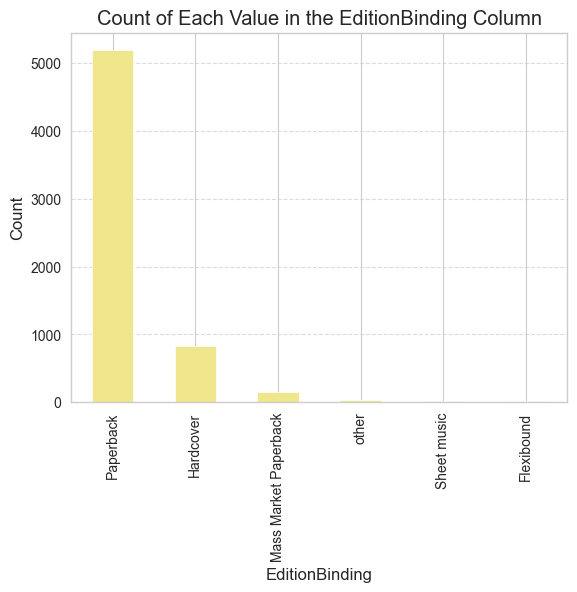

In [185]:
category_counts = df['EditionBinding'].value_counts()
category_counts.plot(kind='bar', color='khaki')
plt.title('Count of Each Value in the EditionBinding Column')
plt.xlabel('EditionBinding')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


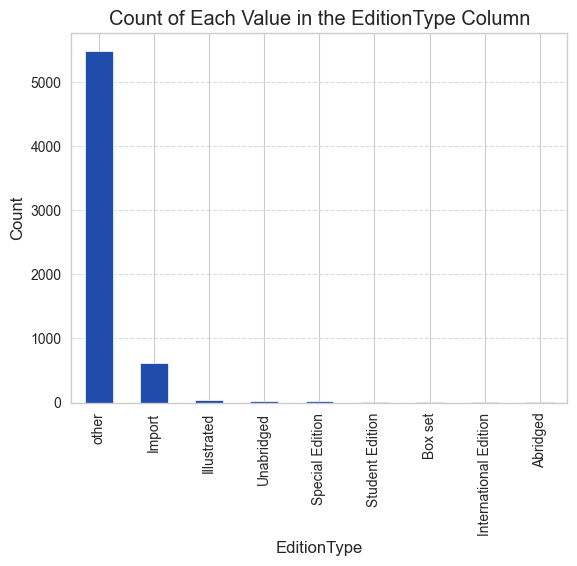

In [186]:
category_counts = df['EditionType'].value_counts()
category_counts.plot(kind='bar', color='#204CAB')
plt.title('Count of Each Value in the EditionType Column')
plt.xlabel('EditionType')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


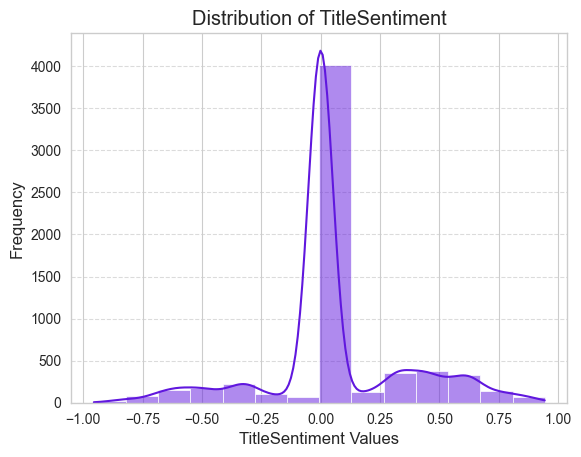

In [187]:
sns.histplot(df['TitleSentiment'], kde=True, color='#6017de', bins='auto')
plt.title('Distribution of TitleSentiment')
plt.xlabel('TitleSentiment Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


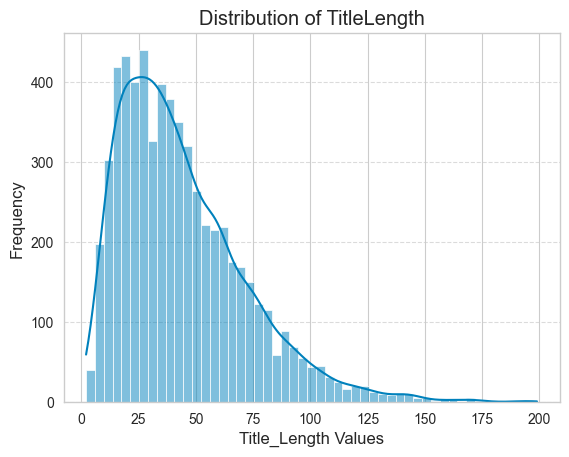

In [188]:
sns.histplot(df['Title_Length'], kde=True, color='#0081bc', bins='auto')
plt.title('Distribution of TitleLength')
plt.xlabel('Title_Length Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


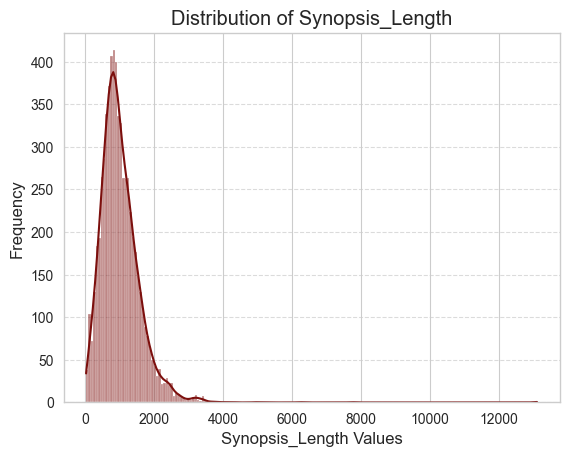

In [189]:
sns.histplot(df['Synopsis_Length'], kde=True, color='#7C0F0D', bins='auto')
plt.title('Distribution of Synopsis_Length')
plt.xlabel('Synopsis_Length Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


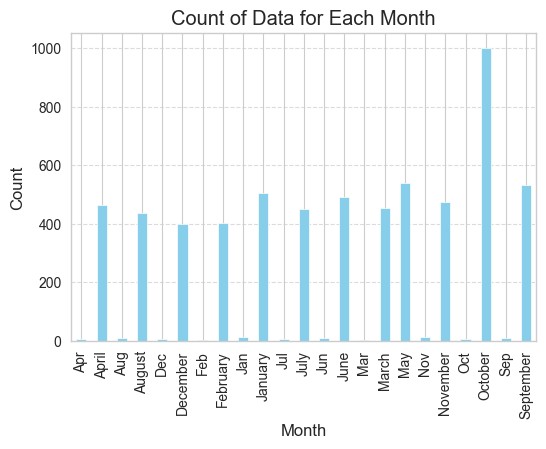

In [190]:
plt.figure(figsize=(6, 4))
df['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Data for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [191]:
month_mapping = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

df['Month'] = df['Month'].replace(month_mapping)


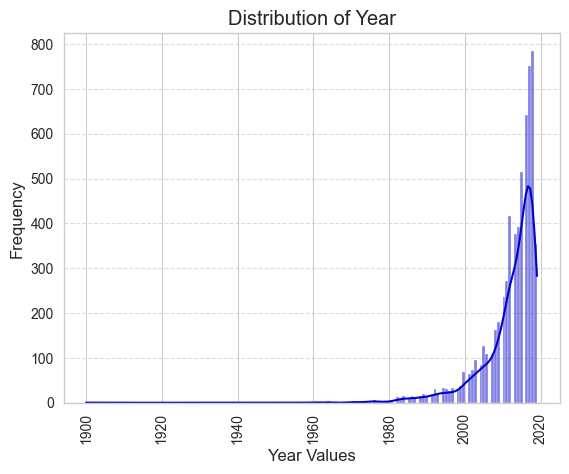

In [192]:
sns.histplot(df['Year'], kde=True, color='#0302ca', bins='auto')
plt.title('Distribution of Year')
plt.xlabel('Year Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


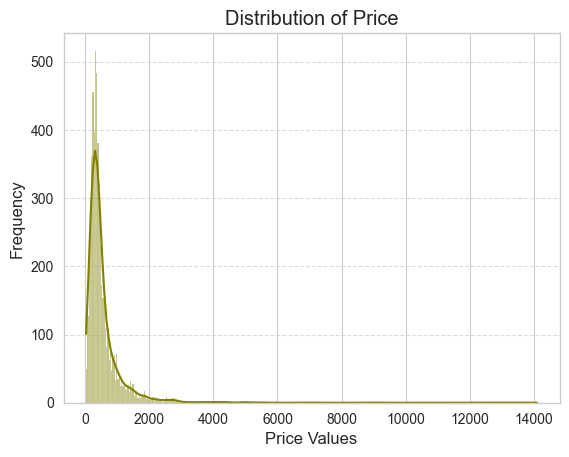

In [193]:
sns.histplot(df['Price'], kde=True, color='olive', bins='auto')
plt.title('Distribution of Price')
plt.xlabel('Price Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


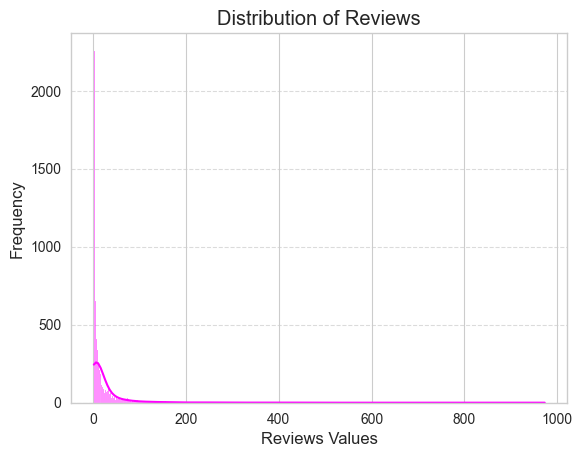

In [194]:
sns.histplot(df['Reviews'], kde=True, color='magenta', bins='auto')
plt.title('Distribution of Reviews')
plt.xlabel('Reviews Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


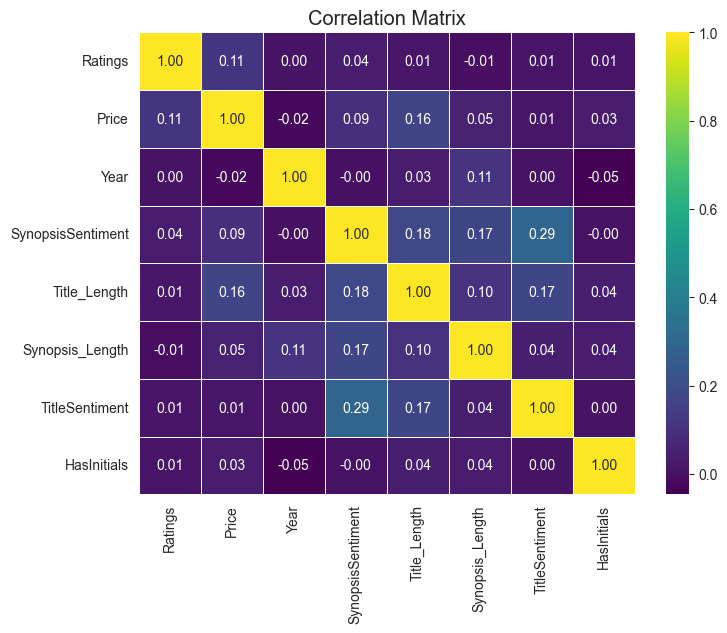

In [195]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.drop(columns=['Unnamed: 0']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [196]:
df.dtypes

Title                        object
Author                       object
Edition                      object
Ratings                     float64
Reviews                       int32
Synopsis                     object
Genre                        object
BookCategory                 object
Price                       float64
Unnamed: 0                  float64
EditionBinding               object
EditionType1                 object
EditionType                  object
EditionDate          datetime64[ns]
Year                        float64
Month                        object
SynopsisSentiment           float64
Title_Length                  int64
Synopsis_Length               int64
TitleSentiment              float64
HasInitials                   int64
dtype: object

## Encoding

In [197]:
categories = df['BookCategory'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='BookCategory')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('BookCategory', axis=1, inplace=True)

In [198]:
categories = df['Genre'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='Genre')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('Genre', axis=1, inplace=True)

In [199]:
categories = df['EditionBinding'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='EditionBinding')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('EditionBinding', axis=1, inplace=True)

In [200]:
categories = df['EditionType'].str.split(', | & ', expand=True)
one_hot_encoded = pd.get_dummies(categories, prefix='EditionType')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('EditionType', axis=1, inplace=True)

In [201]:
df['Month'].unique()

array(['March', 'November', 'February', 'October', 'May', 'December',
       'January', 'June', 'July', 'September', 'August', 'April'],
      dtype=object)

In [202]:
import math
month_to_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['Month_Cos'] = df['Month'].apply(lambda x: round(math.cos(2 * math.pi * month_to_number[x] / 12), 4))
df['Month_Sin'] = df['Month'].apply(lambda x: round(math.sin(2 * math.pi * month_to_number[x] / 12), 4))


In [203]:
df.drop(columns=['Title', 'Author', 'Edition', 'EditionType1', 'Synopsis', 'EditionDate', 'Month', 'EditionDate'], inplace=True)


In [204]:
df.head()

,Ratings,Reviews,Price,Unnamed: 0,Year,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials,BookCategory_Action,BookCategory_Arts,BookCategory_Biographies,BookCategory_Comics,BookCategory_Computing,BookCategory_Crime,BookCategory_Humour,BookCategory_Language,BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,BookCategory_Adventure,BookCategory_Diaries,BookCategory_Film,BookCategory_Internet,BookCategory_Linguistics,BookCategory_Mangas,BookCategory_Thriller,BookCategory_Digital Media,BookCategory_Mystery,BookCategory_Photography,BookCategory_True Accounts,BookCategory_Writing,Genre_API,Genre_Action,Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture,Genre_Air Sports (Books),Genre_Algebra,Genre_Algorithms,Genre_Alphabet Reference,Genre_Alternative Medicine (Books),Genre_American Football (Books),Genre_American Literature,Genre_Americas,Genre_Anatomy,Genre_Ancient History (Books),Genre_Anthologies (Books),Genre_Anthropology (Books),Genre_Archery (Books),Genre_Architecture (Books),Genre_Art Encyclopedias,Genre_Art History,Genre_Artificial Intelligence,Genre_Arts,Genre_Arts History,Genre_Asian History,Genre_Asian Literature,Genre_Astrology,Genre_Astronomy,Genre_Astronomy (Books),Genre_Atheism,Genre_Banks,Genre_Baseball (Books),Genre_Basketball (Books),Genre_Biographies,Genre_Biology,Genre_Biology Books,Genre_Biomedical Engineering,Genre_Biotechnology Engineering Textbooks,Genre_Bodybuilding,Genre_Buddhism (Books),Genre_Budget Travel,Genre_Business,Genre_Business Communication,Genre_Business Ethics,Genre_C# Programming,Genre_CBSE,Genre_CSS Programming,Genre_Calculus,Genre_Camping,Genre_Car Racing (Books),Genre_Chemistry Books,Genre_Children's,Genre_Children's Adventure (Books),Genre_Children's Crafts,Genre_Children's Crime,Genre_Children's Family,Genre_Children's Fantasy (Books),Genre_Children's Games,Genre_Children's Historical Fiction (Books),Genre_Children's History (Books),Genre_Children's Horror,Genre_Children's Humour (Books),Genre_Children's Language Learning (Books),Genre_Children's Mysteries,Genre_Children's Painting,Genre_Children's Picture Books (Books),Genre_Children's Reference (Books),Genre_Children's Science,Genre_Children's Science Fiction (Books),Genre_Children's Sport (Books),Genre_Children's Traditional Stories (Books),Genre_Cinema,Genre_Civil Rights,Genre_Classic Fiction (Books),Genre_Climbing,Genre_Cold War,Genre_Colonialism,Genre_Combat Sports,Genre_Comics,Genre_Communication Reference,Genre_Communications,Genre_Computer Databases (Books),Genre_Computer Hardware,Genre_Computer Science Books,Genre_Computer Security (Books),Genre_Computing,Genre_Constitutional Law,Genre_Contemporary Fiction (Books),Genre_Crafts,Genre_Cricket (Books),Genre_Crime,Genre_Dance (Books),Genre_Design,Genre_Design Pattern Programming,Genre_Development,Genre_Developmental Psychology,Genre_Diaries,Genre_Dictionaries,Genre_Digital Media,Genre_Earth Sciences Textbooks,Genre_Ecology,Genre_Economic Conditions,Genre_Economic History,Genre_Economic Policy,Genre_Economic Theory,Genre_Economics Books,Genre_Economics Textbooks,Genre_Ecotourism,Genre_Education,Genre_Electrical,Genre_Encyclopaedias,Genre_Encyclopedias for Children,Genre_Engineering,Genre_Engineering Services Exams,Genre_English Literature,Genre_Entrepreneurship,Genre_Environmental Economics,Genre_Environmental Engineering,Genre_Environmental Studies,Genre_Essay,Genre_Essays (Books),Genre_Ethics,Genre_European History,Genre_European History Textbooks,Genre_Exam Preparation (Books),Genre_FPC,Genre_Family,Genre_Fantasy,Genre_Film,Genre_Fishing,Genre_Flash Cards,Genre_Food,Genre_Foreign Languages,Genre_French,Genre_GATE Exams,Genre_GMAT,Genre_GRE,Genre_Game Programming,Genre_Games,Genre_Gay,Genre_Gender Studies,Genre_General Dentistry,Genre_Geography Textbooks,Genre_Geometry,Genre_German,Genre_Golf (Books),Genre_Government (Books),Genre_Government Exams,Genre_Governmental,Genre_Grammar (Books),Genre_Grap

In [205]:
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Ratings', 'Reviews', 'Year', 'Title_Length', 'SynopsisSentiment', 'TitleSentiment']
min_max_scaler = MinMaxScaler()
df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

## Modeling

In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)
    
    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    predict = random_forest_regressor.predict(test_df.drop(columns=['Unnamed: 0']))

    return mse_train, mse_test, predict


In [207]:
df.head()

,Ratings,Reviews,Price,Unnamed: 0,Year,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials,BookCategory_Action,BookCategory_Arts,BookCategory_Biographies,BookCategory_Comics,BookCategory_Computing,BookCategory_Crime,BookCategory_Humour,BookCategory_Language,BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,BookCategory_Adventure,BookCategory_Diaries,BookCategory_Film,BookCategory_Internet,BookCategory_Linguistics,BookCategory_Mangas,BookCategory_Thriller,BookCategory_Digital Media,BookCategory_Mystery,BookCategory_Photography,BookCategory_True Accounts,BookCategory_Writing,Genre_API,Genre_Action,Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture,Genre_Air Sports (Books),Genre_Algebra,Genre_Algorithms,Genre_Alphabet Reference,Genre_Alternative Medicine (Books),Genre_American Football (Books),Genre_American Literature,Genre_Americas,Genre_Anatomy,Genre_Ancient History (Books),Genre_Anthologies (Books),Genre_Anthropology (Books),Genre_Archery (Books),Genre_Architecture (Books),Genre_Art Encyclopedias,Genre_Art History,Genre_Artificial Intelligence,Genre_Arts,Genre_Arts History,Genre_Asian History,Genre_Asian Literature,Genre_Astrology,Genre_Astronomy,Genre_Astronomy (Books),Genre_Atheism,Genre_Banks,Genre_Baseball (Books),Genre_Basketball (Books),Genre_Biographies,Genre_Biology,Genre_Biology Books,Genre_Biomedical Engineering,Genre_Biotechnology Engineering Textbooks,Genre_Bodybuilding,Genre_Buddhism (Books),Genre_Budget Travel,Genre_Business,Genre_Business Communication,Genre_Business Ethics,Genre_C# Programming,Genre_CBSE,Genre_CSS Programming,Genre_Calculus,Genre_Camping,Genre_Car Racing (Books),Genre_Chemistry Books,Genre_Children's,Genre_Children's Adventure (Books),Genre_Children's Crafts,Genre_Children's Crime,Genre_Children's Family,Genre_Children's Fantasy (Books),Genre_Children's Games,Genre_Children's Historical Fiction (Books),Genre_Children's History (Books),Genre_Children's Horror,Genre_Children's Humour (Books),Genre_Children's Language Learning (Books),Genre_Children's Mysteries,Genre_Children's Painting,Genre_Children's Picture Books (Books),Genre_Children's Reference (Books),Genre_Children's Science,Genre_Children's Science Fiction (Books),Genre_Children's Sport (Books),Genre_Children's Traditional Stories (Books),Genre_Cinema,Genre_Civil Rights,Genre_Classic Fiction (Books),Genre_Climbing,Genre_Cold War,Genre_Colonialism,Genre_Combat Sports,Genre_Comics,Genre_Communication Reference,Genre_Communications,Genre_Computer Databases (Books),Genre_Computer Hardware,Genre_Computer Science Books,Genre_Computer Security (Books),Genre_Computing,Genre_Constitutional Law,Genre_Contemporary Fiction (Books),Genre_Crafts,Genre_Cricket (Books),Genre_Crime,Genre_Dance (Books),Genre_Design,Genre_Design Pattern Programming,Genre_Development,Genre_Developmental Psychology,Genre_Diaries,Genre_Dictionaries,Genre_Digital Media,Genre_Earth Sciences Textbooks,Genre_Ecology,Genre_Economic Conditions,Genre_Economic History,Genre_Economic Policy,Genre_Economic Theory,Genre_Economics Books,Genre_Economics Textbooks,Genre_Ecotourism,Genre_Education,Genre_Electrical,Genre_Encyclopaedias,Genre_Encyclopedias for Children,Genre_Engineering,Genre_Engineering Services Exams,Genre_English Literature,Genre_Entrepreneurship,Genre_Environmental Economics,Genre_Environmental Engineering,Genre_Environmental Studies,Genre_Essay,Genre_Essays (Books),Genre_Ethics,Genre_European History,Genre_European History Textbooks,Genre_Exam Preparation (Books),Genre_FPC,Genre_Family,Genre_Fantasy,Genre_Film,Genre_Fishing,Genre_Flash Cards,Genre_Food,Genre_Foreign Languages,Genre_French,Genre_GATE Exams,Genre_GMAT,Genre_GRE,Genre_Game Programming,Genre_Games,Genre_Gay,Genre_Gender Studies,Genre_General Dentistry,Genre_Geography Textbooks,Genre_Geometry,Genre_German,Genre_Golf (Books),Genre_Government (Books),Genre_Government Exams,Genre_Governmental,Genre_Grammar (Books),Genre_Grap

In [208]:
df.isnull().sum()

Ratings                           0
Reviews                           0
Price                           537
Unnamed: 0                     5699
Year                              0
                               ... 
EditionType_Student Edition       0
EditionType_Unabridged            0
EditionType_other                 0
Month_Cos                         0
Month_Sin                         0
Length: 516, dtype: int64

In [209]:
test_df = df[df['Price'].isna()].copy()
df.dropna(subset=['Price'], inplace=True)

In [210]:
test_df.shape

(537, 516)

In [211]:
test_df.head()

,Ratings,Reviews,Price,Unnamed: 0,Year,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials,BookCategory_Action,BookCategory_Arts,BookCategory_Biographies,BookCategory_Comics,BookCategory_Computing,BookCategory_Crime,BookCategory_Humour,BookCategory_Language,BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,BookCategory_Adventure,BookCategory_Diaries,BookCategory_Film,BookCategory_Internet,BookCategory_Linguistics,BookCategory_Mangas,BookCategory_Thriller,BookCategory_Digital Media,BookCategory_Mystery,BookCategory_Photography,BookCategory_True Accounts,BookCategory_Writing,Genre_API,Genre_Action,Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture,Genre_Air Sports (Books),Genre_Algebra,Genre_Algorithms,Genre_Alphabet Reference,Genre_Alternative Medicine (Books),Genre_American Football (Books),Genre_American Literature,Genre_Americas,Genre_Anatomy,Genre_Ancient History (Books),Genre_Anthologies (Books),Genre_Anthropology (Books),Genre_Archery (Books),Genre_Architecture (Books),Genre_Art Encyclopedias,Genre_Art History,Genre_Artificial Intelligence,Genre_Arts,Genre_Arts History,Genre_Asian History,Genre_Asian Literature,Genre_Astrology,Genre_Astronomy,Genre_Astronomy (Books),Genre_Atheism,Genre_Banks,Genre_Baseball (Books),Genre_Basketball (Books),Genre_Biographies,Genre_Biology,Genre_Biology Books,Genre_Biomedical Engineering,Genre_Biotechnology Engineering Textbooks,Genre_Bodybuilding,Genre_Buddhism (Books),Genre_Budget Travel,Genre_Business,Genre_Business Communication,Genre_Business Ethics,Genre_C# Programming,Genre_CBSE,Genre_CSS Programming,Genre_Calculus,Genre_Camping,Genre_Car Racing (Books),Genre_Chemistry Books,Genre_Children's,Genre_Children's Adventure (Books),Genre_Children's Crafts,Genre_Children's Crime,Genre_Children's Family,Genre_Children's Fantasy (Books),Genre_Children's Games,Genre_Children's Historical Fiction (Books),Genre_Children's History (Books),Genre_Children's Horror,Genre_Children's Humour (Books),Genre_Children's Language Learning (Books),Genre_Children's Mysteries,Genre_Children's Painting,Genre_Children's Picture Books (Books),Genre_Children's Reference (Books),Genre_Children's Science,Genre_Children's Science Fiction (Books),Genre_Children's Sport (Books),Genre_Children's Traditional Stories (Books),Genre_Cinema,Genre_Civil Rights,Genre_Classic Fiction (Books),Genre_Climbing,Genre_Cold War,Genre_Colonialism,Genre_Combat Sports,Genre_Comics,Genre_Communication Reference,Genre_Communications,Genre_Computer Databases (Books),Genre_Computer Hardware,Genre_Computer Science Books,Genre_Computer Security (Books),Genre_Computing,Genre_Constitutional Law,Genre_Contemporary Fiction (Books),Genre_Crafts,Genre_Cricket (Books),Genre_Crime,Genre_Dance (Books),Genre_Design,Genre_Design Pattern Programming,Genre_Development,Genre_Developmental Psychology,Genre_Diaries,Genre_Dictionaries,Genre_Digital Media,Genre_Earth Sciences Textbooks,Genre_Ecology,Genre_Economic Conditions,Genre_Economic History,Genre_Economic Policy,Genre_Economic Theory,Genre_Economics Books,Genre_Economics Textbooks,Genre_Ecotourism,Genre_Education,Genre_Electrical,Genre_Encyclopaedias,Genre_Encyclopedias for Children,Genre_Engineering,Genre_Engineering Services Exams,Genre_English Literature,Genre_Entrepreneurship,Genre_Environmental Economics,Genre_Environmental Engineering,Genre_Environmental Studies,Genre_Essay,Genre_Essays (Books),Genre_Ethics,Genre_European History,Genre_European History Textbooks,Genre_Exam Preparation (Books),Genre_FPC,Genre_Family,Genre_Fantasy,Genre_Film,Genre_Fishing,Genre_Flash Cards,Genre_Food,Genre_Foreign Languages,Genre_French,Genre_GATE Exams,Genre_GMAT,Genre_GRE,Genre_Game Programming,Genre_Games,Genre_Gay,Genre_Gender Studies,Genre_General Dentistry,Genre_Geography Textbooks,Genre_Geometry,Genre_German,Genre_Golf (Books),Genre_Government (Books),Genre_Government Exams,Genre_Governmental,Genre_Grammar (Books),Genre_Grap

In [212]:
df.shape

(5699, 516)

In [213]:
df.head()

,Ratings,Reviews,Price,Unnamed: 0,Year,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials,BookCategory_Action,BookCategory_Arts,BookCategory_Biographies,BookCategory_Comics,BookCategory_Computing,BookCategory_Crime,BookCategory_Humour,BookCategory_Language,BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,BookCategory_Adventure,BookCategory_Diaries,BookCategory_Film,BookCategory_Internet,BookCategory_Linguistics,BookCategory_Mangas,BookCategory_Thriller,BookCategory_Digital Media,BookCategory_Mystery,BookCategory_Photography,BookCategory_True Accounts,BookCategory_Writing,Genre_API,Genre_Action,Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture,Genre_Air Sports (Books),Genre_Algebra,Genre_Algorithms,Genre_Alphabet Reference,Genre_Alternative Medicine (Books),Genre_American Football (Books),Genre_American Literature,Genre_Americas,Genre_Anatomy,Genre_Ancient History (Books),Genre_Anthologies (Books),Genre_Anthropology (Books),Genre_Archery (Books),Genre_Architecture (Books),Genre_Art Encyclopedias,Genre_Art History,Genre_Artificial Intelligence,Genre_Arts,Genre_Arts History,Genre_Asian History,Genre_Asian Literature,Genre_Astrology,Genre_Astronomy,Genre_Astronomy (Books),Genre_Atheism,Genre_Banks,Genre_Baseball (Books),Genre_Basketball (Books),Genre_Biographies,Genre_Biology,Genre_Biology Books,Genre_Biomedical Engineering,Genre_Biotechnology Engineering Textbooks,Genre_Bodybuilding,Genre_Buddhism (Books),Genre_Budget Travel,Genre_Business,Genre_Business Communication,Genre_Business Ethics,Genre_C# Programming,Genre_CBSE,Genre_CSS Programming,Genre_Calculus,Genre_Camping,Genre_Car Racing (Books),Genre_Chemistry Books,Genre_Children's,Genre_Children's Adventure (Books),Genre_Children's Crafts,Genre_Children's Crime,Genre_Children's Family,Genre_Children's Fantasy (Books),Genre_Children's Games,Genre_Children's Historical Fiction (Books),Genre_Children's History (Books),Genre_Children's Horror,Genre_Children's Humour (Books),Genre_Children's Language Learning (Books),Genre_Children's Mysteries,Genre_Children's Painting,Genre_Children's Picture Books (Books),Genre_Children's Reference (Books),Genre_Children's Science,Genre_Children's Science Fiction (Books),Genre_Children's Sport (Books),Genre_Children's Traditional Stories (Books),Genre_Cinema,Genre_Civil Rights,Genre_Classic Fiction (Books),Genre_Climbing,Genre_Cold War,Genre_Colonialism,Genre_Combat Sports,Genre_Comics,Genre_Communication Reference,Genre_Communications,Genre_Computer Databases (Books),Genre_Computer Hardware,Genre_Computer Science Books,Genre_Computer Security (Books),Genre_Computing,Genre_Constitutional Law,Genre_Contemporary Fiction (Books),Genre_Crafts,Genre_Cricket (Books),Genre_Crime,Genre_Dance (Books),Genre_Design,Genre_Design Pattern Programming,Genre_Development,Genre_Developmental Psychology,Genre_Diaries,Genre_Dictionaries,Genre_Digital Media,Genre_Earth Sciences Textbooks,Genre_Ecology,Genre_Economic Conditions,Genre_Economic History,Genre_Economic Policy,Genre_Economic Theory,Genre_Economics Books,Genre_Economics Textbooks,Genre_Ecotourism,Genre_Education,Genre_Electrical,Genre_Encyclopaedias,Genre_Encyclopedias for Children,Genre_Engineering,Genre_Engineering Services Exams,Genre_English Literature,Genre_Entrepreneurship,Genre_Environmental Economics,Genre_Environmental Engineering,Genre_Environmental Studies,Genre_Essay,Genre_Essays (Books),Genre_Ethics,Genre_European History,Genre_European History Textbooks,Genre_Exam Preparation (Books),Genre_FPC,Genre_Family,Genre_Fantasy,Genre_Film,Genre_Fishing,Genre_Flash Cards,Genre_Food,Genre_Foreign Languages,Genre_French,Genre_GATE Exams,Genre_GMAT,Genre_GRE,Genre_Game Programming,Genre_Games,Genre_Gay,Genre_Gender Studies,Genre_General Dentistry,Genre_Geography Textbooks,Genre_Geometry,Genre_German,Genre_Golf (Books),Genre_Government (Books),Genre_Government Exams,Genre_Governmental,Genre_Grammar (Books),Genre_Grap

In [214]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [215]:
test_df.drop(columns=['Price'], inplace=True)

In [216]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [217]:
mse_train, mse_test, predict = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 56264.211572963985 // Test mse is: 270643.60718845867


In [218]:
predict

array([ 886.3945    ,  474.0616    ,  373.9992    ,  252.6568    ,
        621.4721    , 1163.7611    ,  390.4643    , 2095.0432    ,
       1952.7409    ,  850.2185    ,  267.7873    ,  821.1643    ,
        584.8342    ,  245.1904    , 1081.3579    ,  307.44796667,
        860.5325    ,  802.5795    ,  248.8045    ,  381.4263    ,
        387.393     ,  694.006     ,  414.1229    ,  502.5993    ,
        320.236     ,  731.8278    ,  569.5412    ,  763.1161    ,
        676.9238    ,  300.7422    ,  587.00573333,  689.3749    ,
        511.3825    ,  283.81766667,  369.9033    ,  406.2549    ,
       4032.867     , 1157.4247    ,  354.0659    ,  797.5175    ,
       1085.2139    ,  604.9492    ,  524.80213333,  520.668     ,
        653.0924    ,  426.55783333,  245.0325    ,  281.827     ,
       1015.712     ,  760.346     , 1808.477     , 1166.44      ,
        569.4711    ,  353.8966    ,  254.4003    ,  452.1626    ,
        589.4353    ,  617.6046    , 1046.0844    ,  737.2545 

In [219]:
prd = pd.DataFrame({'Price': predict})
prd.index.name = 'index'
prd.to_csv('./output-1.csv')

In [220]:
test_df.drop(columns=['Unnamed: 0']).columns

Index(['Ratings', 'Reviews', 'Year', 'SynopsisSentiment', 'Title_Length',
       'Synopsis_Length', 'TitleSentiment', 'HasInitials',
       'BookCategory_Action', 'BookCategory_Arts',
       ...
       'EditionType_Box set', 'EditionType_Illustrated', 'EditionType_Import',
       'EditionType_International Edition', 'EditionType_Special Edition',
       'EditionType_Student Edition', 'EditionType_Unabridged',
       'EditionType_other', 'Month_Cos', 'Month_Sin'],
      dtype='object', length=514)

In [221]:
X_train.columns

Index(['Ratings', 'Reviews', 'Year', 'SynopsisSentiment', 'Title_Length',
       'Synopsis_Length', 'TitleSentiment', 'HasInitials',
       'BookCategory_Action', 'BookCategory_Arts',
       ...
       'EditionType_Box set', 'EditionType_Illustrated', 'EditionType_Import',
       'EditionType_International Edition', 'EditionType_Special Edition',
       'EditionType_Student Edition', 'EditionType_Unabridged',
       'EditionType_other', 'Month_Cos', 'Month_Sin'],
      dtype='object', length=514)

In [222]:
test_df.head()

,Ratings,Reviews,Unnamed: 0,Year,SynopsisSentiment,Title_Length,Synopsis_Length,TitleSentiment,HasInitials,BookCategory_Action,BookCategory_Arts,BookCategory_Biographies,BookCategory_Comics,BookCategory_Computing,BookCategory_Crime,BookCategory_Humour,BookCategory_Language,BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,BookCategory_Adventure,BookCategory_Diaries,BookCategory_Film,BookCategory_Internet,BookCategory_Linguistics,BookCategory_Mangas,BookCategory_Thriller,BookCategory_Digital Media,BookCategory_Mystery,BookCategory_Photography,BookCategory_True Accounts,BookCategory_Writing,Genre_API,Genre_Action,Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture,Genre_Air Sports (Books),Genre_Algebra,Genre_Algorithms,Genre_Alphabet Reference,Genre_Alternative Medicine (Books),Genre_American Football (Books),Genre_American Literature,Genre_Americas,Genre_Anatomy,Genre_Ancient History (Books),Genre_Anthologies (Books),Genre_Anthropology (Books),Genre_Archery (Books),Genre_Architecture (Books),Genre_Art Encyclopedias,Genre_Art History,Genre_Artificial Intelligence,Genre_Arts,Genre_Arts History,Genre_Asian History,Genre_Asian Literature,Genre_Astrology,Genre_Astronomy,Genre_Astronomy (Books),Genre_Atheism,Genre_Banks,Genre_Baseball (Books),Genre_Basketball (Books),Genre_Biographies,Genre_Biology,Genre_Biology Books,Genre_Biomedical Engineering,Genre_Biotechnology Engineering Textbooks,Genre_Bodybuilding,Genre_Buddhism (Books),Genre_Budget Travel,Genre_Business,Genre_Business Communication,Genre_Business Ethics,Genre_C# Programming,Genre_CBSE,Genre_CSS Programming,Genre_Calculus,Genre_Camping,Genre_Car Racing (Books),Genre_Chemistry Books,Genre_Children's,Genre_Children's Adventure (Books),Genre_Children's Crafts,Genre_Children's Crime,Genre_Children's Family,Genre_Children's Fantasy (Books),Genre_Children's Games,Genre_Children's Historical Fiction (Books),Genre_Children's History (Books),Genre_Children's Horror,Genre_Children's Humour (Books),Genre_Children's Language Learning (Books),Genre_Children's Mysteries,Genre_Children's Painting,Genre_Children's Picture Books (Books),Genre_Children's Reference (Books),Genre_Children's Science,Genre_Children's Science Fiction (Books),Genre_Children's Sport (Books),Genre_Children's Traditional Stories (Books),Genre_Cinema,Genre_Civil Rights,Genre_Classic Fiction (Books),Genre_Climbing,Genre_Cold War,Genre_Colonialism,Genre_Combat Sports,Genre_Comics,Genre_Communication Reference,Genre_Communications,Genre_Computer Databases (Books),Genre_Computer Hardware,Genre_Computer Science Books,Genre_Computer Security (Books),Genre_Computing,Genre_Constitutional Law,Genre_Contemporary Fiction (Books),Genre_Crafts,Genre_Cricket (Books),Genre_Crime,Genre_Dance (Books),Genre_Design,Genre_Design Pattern Programming,Genre_Development,Genre_Developmental Psychology,Genre_Diaries,Genre_Dictionaries,Genre_Digital Media,Genre_Earth Sciences Textbooks,Genre_Ecology,Genre_Economic Conditions,Genre_Economic History,Genre_Economic Policy,Genre_Economic Theory,Genre_Economics Books,Genre_Economics Textbooks,Genre_Ecotourism,Genre_Education,Genre_Electrical,Genre_Encyclopaedias,Genre_Encyclopedias for Children,Genre_Engineering,Genre_Engineering Services Exams,Genre_English Literature,Genre_Entrepreneurship,Genre_Environmental Economics,Genre_Environmental Engineering,Genre_Environmental Studies,Genre_Essay,Genre_Essays (Books),Genre_Ethics,Genre_European History,Genre_European History Textbooks,Genre_Exam Preparation (Books),Genre_FPC,Genre_Family,Genre_Fantasy,Genre_Film,Genre_Fishing,Genre_Flash Cards,Genre_Food,Genre_Foreign Languages,Genre_French,Genre_GATE Exams,Genre_GMAT,Genre_GRE,Genre_Game Programming,Genre_Games,Genre_Gay,Genre_Gender Studies,Genre_General Dentistry,Genre_Geography Textbooks,Genre_Geometry,Genre_German,Genre_Golf (Books),Genre_Government (Books),Genre_Government Exams,Genre_Governmental,Genre_Grammar (Books),Genre_Graphics,G